In [64]:
import scipy
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import discriminant_analysis
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import xgboost as xgb

TrainSet = pd.read_csv('TrainingDataMulti.csv')

TestSet = pd.read_csv('TestingDataMulti.csv')



TrainLabels = TrainSet.iloc[:,128]

TrainSet = TrainSet.drop(TrainSet.columns[128], axis =1)

In [42]:
xgb_model = xgb.XGBClassifier(objective="multi:softmax")
#xgb_model.fit(TrainSet, TrainLabels)
scores = cross_val_score(xgb_model, TrainSet, TrainLabels, cv=5)

In [43]:
scores.mean()

0.4485738115095913

In [41]:
pca = PCA(n_components=2, svd_solver='full')
TrainSet = pca.fit_transform(TrainSet)

In [40]:
scaler = StandardScaler()
scaler.fit(TrainSet)
TrainSet = scaler.transform(TrainSet)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(TrainSet, TrainLabels)

scores = cross_val_score(xgb_model, TrainSet, TrainLabels, cv=5)
print(scores.mean())

0.65328204058938


In [12]:
lda = QuadraticDiscriminantAnalysis()
lda.fit(TrainSet, TrainLabels)
scores = cross_val_score(lda, TrainSet, TrainLabels, cv=5)
print(scores.mean())

c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\pfory\AppData\Local\Programs\Python\Pytho

0.663615929941618


In [19]:
rf = RandomForestClassifier(max_depth=100, random_state=0)
rf.fit(TrainSet, TrainLabels)

scores = cross_val_score(rf, TrainSet, TrainLabels, cv=5)
print(scores.mean())

0.6177753683625242


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
#logistic = LogisticRegression(max_iter=50000, tol=0.001)
logistic = RandomForestClassifier(max_depth=100, random_state=0)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

#TrainSet, TrainLabels = datasets.load_digits(return_X_y=True)





print (TrainSet.shape)
print (TrainLabels.shape)

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60, 75, 90],
    "logistic__C": np.logspace(-1, 1, 1),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2,cv=5)
search.fit(TrainSet, TrainLabels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(TrainSet)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
print (results)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()


(5999, 128)
(5999,)


ValueError: Invalid parameter C for estimator RandomForestClassifier(max_depth=100, random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(TrainSet, TrainLabels)
best_grid = grid_search.best_estimator_
scores = cross_val_score(best_grid, TrainSet, TrainLabels, cv=5)
print(scores.mean())

(5999, 128)
(5999,)
Best parameter (CV score=0.903):
{'logistic__bootstrap': True, 'logistic__max_depth': 100, 'logistic__min_samples_leaf': 2, 'logistic__min_samples_split': 4, 'logistic__n_estimators': 200, 'logistic__n_jobs': -1, 'logistic__random_state': 0, 'pca__n_components': 60}
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.011803      0.065186         0.050775        0.012499   
1         0.945164      0.059287         0.052339        0.017585   
2         0.802094      0.067466         0.055482        0.016584   
3         1.020903      0.056409         0.056501        0.014543   
4         0.845327      0.051020         0.042958        0.009623   
..             ...           ...              ...             ...   
643       8.817371      0.148940         0.389688        0.044520   
644       7.882201      0.340146         0.332679        0.061889   
645       8.796754      0.212979         0.402199        0.030862   
646       7.861657     

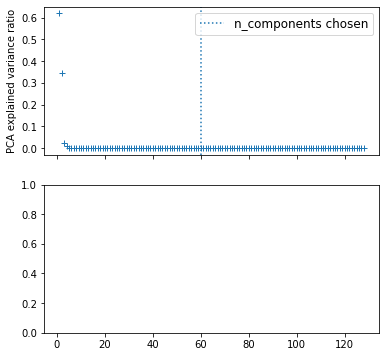

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
#logistic = LogisticRegression(max_iter=50000, tol=0.001)
logistic = RandomForestClassifier(max_depth=100, random_state=0)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

#TrainSet, TrainLabels = datasets.load_digits(return_X_y=True)





print (TrainSet.shape)
print (TrainLabels.shape)

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [45, 60, ],
    'logistic__bootstrap': [True],
    'logistic__max_depth': [80, 100],
    'logistic__min_samples_leaf': [1, 2, 3 ],
    'logistic__min_samples_split': [2, 4, 8  ],
    'logistic__n_estimators': [100, 200, 1000],
    'logistic__n_jobs':[-1],
    'logistic__random_state':[0,1,2,3,4,5]
}
search = GridSearchCV(pipe, param_grid, n_jobs=2,cv=5)
search.fit(TrainSet, TrainLabels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(TrainSet)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
print (results)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)


In [5]:
best_grid = search.best_estimator_
scores = cross_val_score(best_grid, TrainSet, TrainLabels, cv=5)
print(scores.mean())

0.9023133166527663


In [6]:
best_grid

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic',
                 RandomForestClassifier(max_depth=100, min_samples_leaf=2,
                                        min_samples_split=4, n_estimators=200,
                                        n_jobs=-1, random_state=0))])

(5999, 128)
(5999,)


c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\pfory\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\parallel.py", line 252, in __call_

Best parameter (CV score=0.662):
{'logistic__bootstrap': True, 'logistic__max_depth': 80, 'logistic__min_samples_leaf': 6, 'logistic__min_samples_split': 2, 'logistic__n_estimators': 200, 'logistic__n_jobs': -1, 'pca__n_components': 60}
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.290187      0.772152         0.000000        0.000000   
1        2.594506      0.058815         0.000000        0.000000   
2        2.603820      0.099586         0.000000        0.000000   
3        2.940632      0.088725         0.000000        0.000000   
4        1.114062      0.995991         0.041392        0.001344   
5        0.787569      0.019025         0.108947        0.027282   
6        1.067930      0.026896         0.069194        0.001717   
7        1.315213      0.022515         0.103823        0.028153   
8        2.206983      0.953440         0.000000        0.000000   
9        2.713741      0.025576         0.000000        0.000000   
10       2.7684

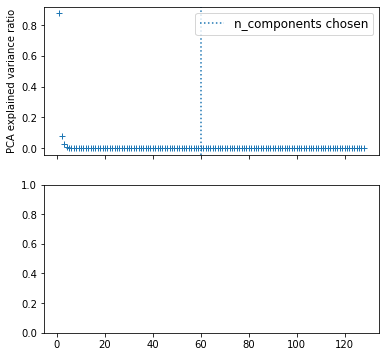

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = RobustScaler()

# set the tolerance to a large value to make the example faster
#logistic = LogisticRegression(max_iter=50000, tol=0.001)
logistic = RandomForestClassifier(max_depth=100, random_state=0)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

#TrainSet, TrainLabels = datasets.load_digits(return_X_y=True)





print (TrainSet.shape)
print (TrainLabels.shape)

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [45, 60, ],
    'logistic__bootstrap': [True],
    'logistic__max_depth': [80, 100],
    'logistic__min_samples_leaf': [4,6,8],
    'logistic__min_samples_split': [1, 2],
    'logistic__n_estimators': [100, 200],
    'logistic__n_jobs':[-1],
}
search = GridSearchCV(pipe, param_grid, n_jobs=1,cv=5)
search.fit(TrainSet, TrainLabels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(TrainSet)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
print (results)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)


In [34]:
best_grid = search.best_estimator_
scores = cross_val_score(best_grid, TrainSet, TrainLabels, cv=5)
print(scores.mean())
print(search.best_params_)

0.6567806505421185
{'logistic__bootstrap': True, 'logistic__max_depth': 80, 'logistic__min_samples_leaf': 6, 'logistic__min_samples_split': 2, 'logistic__n_estimators': 200, 'logistic__n_jobs': -1, 'pca__n_components': 60}


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = KernelPCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
#logistic = LogisticRegression(max_iter=50000, tol=0.001)
lr = LogisticRegression(max_iter = 50000)
svc = svm.SVC(kernel='poly', degree = 4)
qda = QuadraticDiscriminantAnalysis()
rf = xgb.XGBClassifier(objective="multi:softmax", booster = 'gbtree')
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("rf", rf)])

#TrainSet, TrainLabels = datasets.load_digits(return_X_y=True)


# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    #"pca__n_components": [60]
    #'rf__colsample_bynode': [0.8],
    #'rf__learning_rate': [0.1,],
    #'rf__max_depth': [4,5],
    #'rf__num_parallel_tree': [10],
    #'rf__subsample': [0.8],
    #'rf__tree_method': ['gpu_hist']

}
search = GridSearchCV(pipe, param_grid, n_jobs=1,cv=5)
search.fit(TrainSet, TrainLabels)


print(search.best_score_)

0.6709494022796776


In [14]:
best_grid

NameError: name 'best_grid' is not defined

(5999, 128)
(5999,)
Best parameter (CV score=0.655):
{'logistic__learning_rate': 0.1, 'logistic__n_estimators': 1000, 'pca__n_components': 45}
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.362435      0.032981         0.009712        0.001238   
1        0.481491      0.021490         0.010186        0.001168   
2        0.560957      0.024741         0.010403        0.001361   
3        0.753051      0.051270         0.010794        0.000756   
4        1.275050      0.009534         0.024798        0.000753   
5        1.682935      0.009632         0.025599        0.000478   
6        2.181369      0.111208         0.028800        0.002316   
7        2.706791      0.021321         0.031044        0.001726   
8        2.396550      0.003505         0.042213        0.000977   
9        3.190675      0.012751         0.046402        0.001344   
10       3.980079      0.044503         0.048800        0.002136   
11       5.200943      0.022856         0

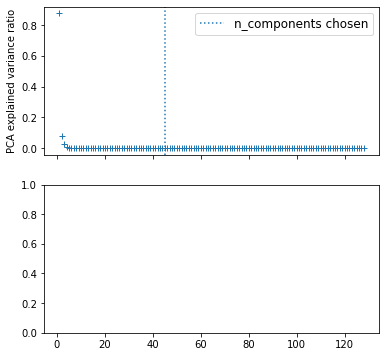

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = RobustScaler()

# set the tolerance to a large value to make the example faster
#logistic = LogisticRegression(max_iter=50000, tol=0.001)
logistic = AdaBoostClassifier()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

#TrainSet, TrainLabels = datasets.load_digits(return_X_y=True)





print (TrainSet.shape)
print (TrainLabels.shape)

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [45, 60, 75, 100 ],
    "logistic__n_estimators": [10,50,100,1000],
    "logistic__learning_rate":[0.1, 1, 10],
}
search = GridSearchCV(pipe, param_grid, n_jobs=1,cv=5)
search.fit(TrainSet, TrainLabels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(TrainSet)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
print (results)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)


In [36]:
best_grid = search.best_estimator_
scores = cross_val_score(best_grid, TrainSet, TrainLabels, cv=5)
print(scores.mean())

0.65428204058938
